In [1]:
import json
import os
import pandas as pd

def read_json_files(file_path, model_name):
    data_list = []
    try:
        with open(file_path, 'r') as f:
            json_data = json.load(f)
            json_data['Model'] = model_name
            if 'Latency_ms' in json_data:
                latency = json_data.pop('Latency_ms')
                json_data.update({
                    'Latency_avg': latency.get('average'),
                    'Latency_min': latency.get('min'),
                    'Latency_max': latency.get('max')
                    })
                
            data_list.append(json_data)         
    except Exception as e:
        print(f"Error: {e}")
            
    # 转换为DataFrame
    df = pd.DataFrame(data_list)
    
    return df



In [15]:
s = read_json_files('../val_results/yolov12s_finetune/test/metrics_s.json', 'yolov12s_finetune')

In [18]:
s['model'] = 'yolov12s_finetune'
columns = ['model'] + [col for col in s.columns if col != 'model']
s = s[columns]

In [19]:
s.head()

,model,mAP50,mAP50_95,mAP75,mAP50_Small,mAP50_95_Small,mAP75_Small,mAP50_Medium,mAP50_95_Medium,mAP75_Medium,mAP50_Large,mAP50_95_Large,mAP75_Large,FLOPs_G,Model,Latency_avg,Latency_min,Latency_max
0,yolov12s_finetune,0.73749,0.330318,0.307194,0.0,0.0,0.0,0.310856,0.126164,0.07753,0.58255,0.292905,0.307868,9.793203,yolov12s_finetune,54.679569,20.162106,378.201485


In [24]:
df = yolov12s_m_n_finetune

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/5n/rq1tl9hd4k76sz1wqg3hp4g00000gn/T/ipykernel_8420/915140128.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_data, x='Metric', y='Value', palette='viridis')
/var/folders/5n/rq1tl9hd4k76sz1wqg3hp4g00000gn/T/ipykernel_8420/915140128.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_data, x='Metric', y='Value', palette='viridis')
/var/folders/5n/rq1tl9hd4k76sz1wqg3hp4g00000gn/T/ipykernel_8420/915140128.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_data, x='Metric', y='Value', palette=

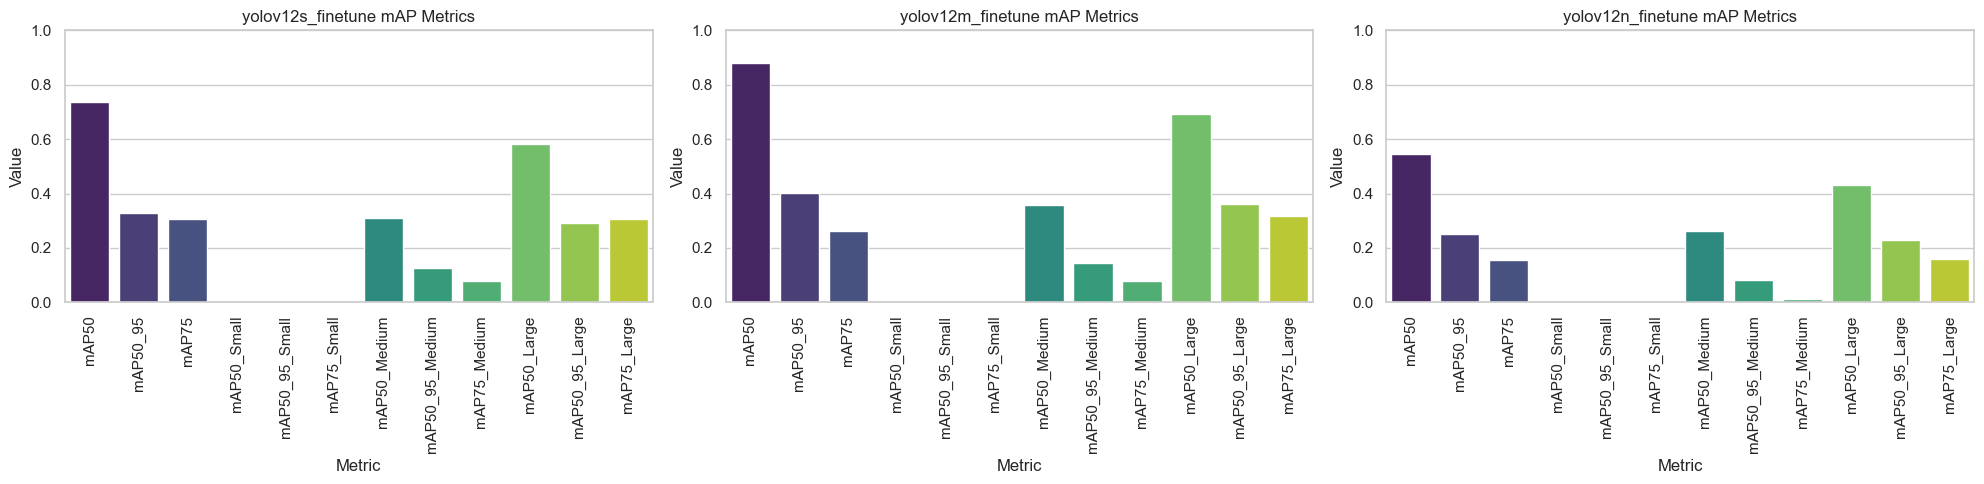

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(20, 5))

map_columns = [col for col in df.columns if col.startswith('mAP')]

for i, model in enumerate(df['model']):
    plt.subplot(1, 3, i+1)
    model_data = df[df['model'] == model][map_columns].melt(var_name='Metric', value_name='Value')
    sns.barplot(data=model_data, x='Metric', y='Value', palette='viridis')
    plt.title(f'{model} mAP Metrics')
    plt.ylim(0, 1)
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

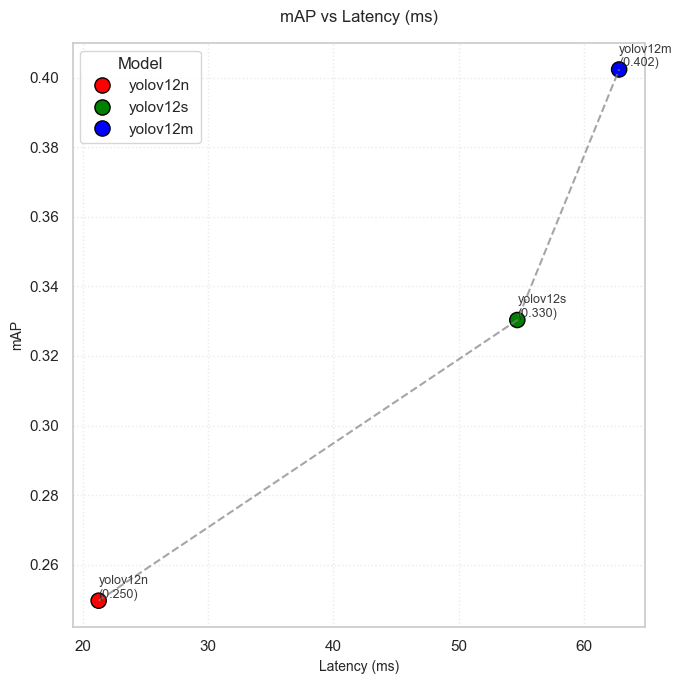

In [45]:
plt.figure(figsize=(7, 7))

df_sorted = df.sort_values('Latency_avg')

palette = {'yolov12n_finetune': 'red', 
           'yolov12s_finetune': 'green',
           'yolov12m_finetune': 'blue'}

plt.plot(df_sorted['Latency_avg'], df_sorted['mAP50_95'], 
         color='gray', linestyle='--', linewidth=1.5, alpha=0.7,
         label='_nolegend_')

scatter = sns.scatterplot(data=df_sorted, x='Latency_avg', y='mAP50_95',
                         hue='model', palette=palette, s=120,
                         edgecolor='black', linewidth=1)

for _, row in df_sorted.iterrows():
    plt.text(row['Latency_avg'], row['mAP50_95'], 
             f"{row['model'].replace('_finetune','')}\n({row['mAP50_95']:.3f})",
             fontsize=9, ha='left', va='bottom', alpha=0.9)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [label.replace('_finetune', '') for label in labels]

plt.title('mAP vs Latency (ms)', fontsize=12, pad=15)
plt.xlabel('Latency (ms)', fontsize=10)
plt.ylabel('mAP', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.4)
plt.legend(handles, new_labels, title='Model')

plt.tight_layout()
plt.show()

In [43]:
df

,model,mAP50,mAP50_95,mAP75,mAP50_Small,mAP50_95_Small,mAP75_Small,mAP50_Medium,mAP50_95_Medium,mAP75_Medium,mAP50_Large,mAP50_95_Large,mAP75_Large,FLOPs_G,Model,Latency_avg,Latency_min,Latency_max
0,yolov12s_finetune,0.737490,0.330318,0.307194,0.0,0.0,0.0,0.310856,0.126164,0.077530,0.582550,0.292905,0.307868,9.793203,yolov12s_finetune,54.679569,20.162106,378.201485
1,yolov12m_finetune,0.880848,0.402327,0.262563,0.0,0.0,0.0,0.358109,0.143960,0.077090,0.694472,0.361170,0.316144,30.056474,yolov12m_finetune,62.800201,21.061897,484.457970
2,yolov12n_finetune,0.545657,0.249648,0.156161,0.0,0.0,0.0,0.262487,0.081339,0.013002,0.431640,0.228313,0.157959,2.991923,yolov12n_finetune,21.286488,19.129992,29.751062


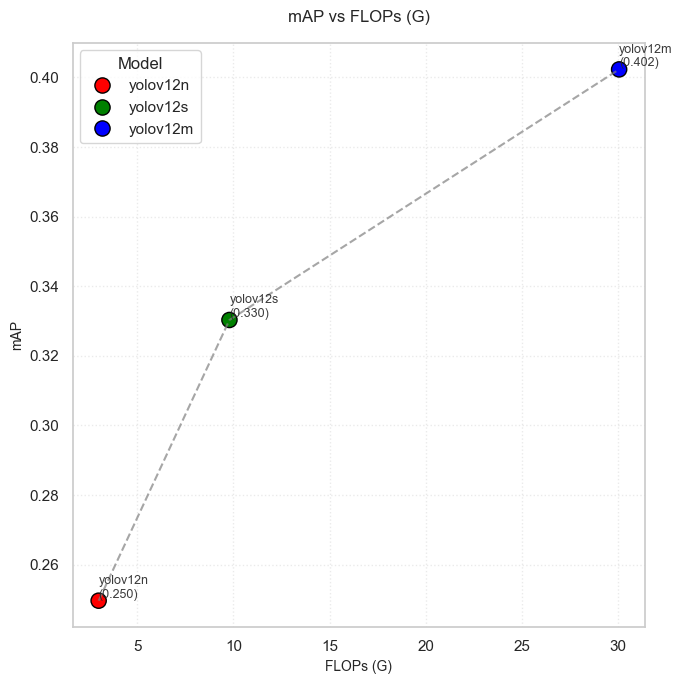

In [46]:
plt.figure(figsize=(7, 7))

df_sorted = df.sort_values('FLOPs_G')

palette = {'yolov12n_finetune': 'red', 
           'yolov12s_finetune': 'green',
           'yolov12m_finetune': 'blue'}

plt.plot(df_sorted['FLOPs_G'], df_sorted['mAP50_95'], 
         color='gray', linestyle='--', linewidth=1.5, alpha=0.7,
         label='_nolegend_')

scatter = sns.scatterplot(data=df_sorted, x='FLOPs_G', y='mAP50_95',
                         hue='model', palette=palette, s=120,
                         edgecolor='black', linewidth=1)

for _, row in df_sorted.iterrows():
    plt.text(row['FLOPs_G'], row['mAP50_95'], 
             f"{row['model'].replace('_finetune','')}\n({row['mAP50_95']:.3f})",
             fontsize=9, ha='left', va='bottom', alpha=0.9)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [label.replace('_finetune', '') for label in labels]

plt.title('mAP vs FLOPs (G)', fontsize=12, pad=15)
plt.xlabel('FLOPs (G)', fontsize=10)
plt.ylabel('mAP', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.4)
plt.legend(handles, new_labels, title='Model')

plt.tight_layout()
plt.show()